In [166]:
import pandas as pd
import json

with open('../json/AAPL_all.json') as f:
  data = json.load(f)


In [167]:
data_fcf_df = pd.DataFrame(data['freecashflow'])


In [168]:
print(data_fcf_df.head())

print(data_fcf_df.__len__())

         date          value
0  2018-09-29  54195760723.2
1  2017-09-30  43144075270.3
2  2016-09-24  45004511829.5
3  2015-09-26  66033833138.0
4  2014-09-27  40931035375.7
9


In [169]:
invert_df = data_fcf_df.iloc[::-1]
print(invert_df)

invert_df = invert_df.loc[invert_df['value'] != 'None']

         date          value
8  2010-09-25  14763847087.4
7  2011-09-24  27342495395.4
6  2012-09-29  39428335473.3
5  2013-09-28  39394350872.3
4  2014-09-27  40931035375.7
3  2015-09-26  66033833138.0
2  2016-09-24  45004511829.5
1  2017-09-30  43144075270.3
0  2018-09-29  54195760723.2


In [170]:
f = 8
for n in range(1,10):
    invert_df.at[f,'order'] = n
    f-=1

In [171]:
invert_df



,date,value,order
8,2010-09-25,14763847087.4,1.0
7,2011-09-24,27342495395.4,2.0
6,2012-09-29,39428335473.3,3.0
5,2013-09-28,39394350872.3,4.0
4,2014-09-27,40931035375.7,5.0
3,2015-09-26,66033833138.0,6.0
2,2016-09-24,45004511829.5,7.0
1,2017-09-30,43144075270.3,8.0
0,2018-09-29,54195760723.2,9.0


In [172]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [173]:
# Split the data into training/testing sets
X= invert_df['order'].to_numpy()
y = invert_df['value'].to_numpy()

print(len(X))
print(len(y))

9
9


In [174]:
X_train = X[0:6]
X_test = X[6:9]

# Split the targets into training/testing sets
y_train = y[0:6]
y_test = y[6:9]

print(X_train)
print('-----')
print(X_test)
print('-----')
print(y_train)
print('-----')
print(y_test)

[1. 2. 3. 4. 5. 6.]
-----
[7. 8. 9.]
-----
['14763847087.4' '27342495395.4' '39428335473.3' '39394350872.3'
 '40931035375.7' '66033833138.0']
-----
['45004511829.5' '43144075270.3' '54195760723.2']


In [175]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
#y_test = y_test.reshape(-1, 1)

In [176]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [177]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [178]:
y_pred = regr.predict(X_test)

In [179]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[8.48804473e+09]]
Mean squared error: 844798981384944877568.00
Coefficient of determination: -35.19


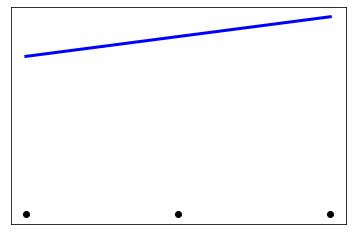

In [180]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

(array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

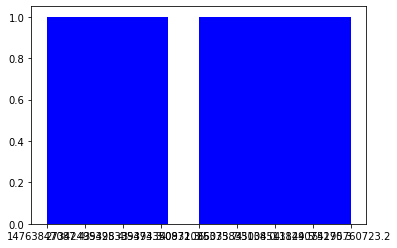

In [181]:
plt.hist(y, color='blue', linewidth=3)

In [182]:
print(y)

['14763847087.4' '27342495395.4' '39428335473.3' '39394350872.3'
 '40931035375.7' '66033833138.0' '45004511829.5' '43144075270.3'
 '54195760723.2']


In [183]:

print(y.sort(axis=-1, kind='quicksort', order=None))

None


In [184]:
print(y)



['14763847087.4' '27342495395.4' '39394350872.3' '39428335473.3'
 '40931035375.7' '43144075270.3' '45004511829.5' '54195760723.2'
 '66033833138.0']
